In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

# 0. Introduction

## 0.1 La p-value

La p-value est la probabilité pour un modèle statistique donné sous l'hypothèse nulle d'obtenir une valeur au moins aussi extrême que celle observée. Elle est comprise entre 0 et 1.

Autrement dit, elle représente la probabilité que notre échantillon provienne du modèle définit par notre hypothèse nulle. Inférieur à un niveau appelé *alpha*, nous sommes contraints de rejeter notre hypothèse nulle (ayant de faible probabilité de provenir de notre modèle définit par H0). Supérieur à alpha, nous ne rejetons pas notre hypothèse nulle est concluons qu'elle est vrai.

## 0.2 La valeur alpha

La valeur alpha ou niveau de significativité est le seuil de risque au-dessus duquel H0 ne doit pas être rejeté. Il est compris entre 0 et 1. 

## 0.3 Tester la normalité avec le test de Shapiro-Wilk

Une des conditions principale des test paramétriques est la normalité de la distribution. 

Le test de Shapiro-Wilk permet de s'assurer de la normalité avant de procéder à nos tests statistiques.

# 1. Analyse des liaisons entre deux variables quantitatives

## 1.1 Analyse graphique

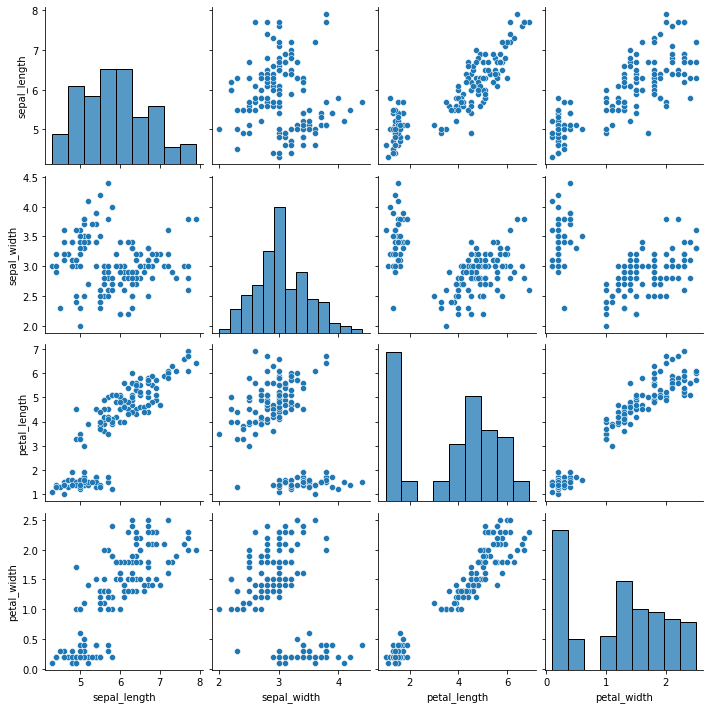

In [4]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, kind='scatter')

Suite à l'analyse graphique, il semble y avoir une relation de corrélation entre petal_length et pental_width.

## 1.2 Test de corrélation de Pearson

### 1.2.1 Les hypothèses:

* H0(soit l'hypothèse nulle): Il n'y a pas de corrélation linéaire entre les deux variables. 

* H1(soit l'hypothèse alternative): Il existe une corrélation linéaire entre les deux variables.

### 1.2.2 Les Conditions d'utilisations:

* Les deux variables doivent être quantitatives et mesurée sur une échelle continue.
* La relation entre les deux variables est linéaire.
* Les deux variables suivent une loi normale.

### 1.2.3 L'interprétation:

Le coefficient de corréltion de pearson varie entre 1 et -1: 

- Si le coefficient est proche de 1 par exemple (0.6), alors il y a une corrélation positive entre les deux variables. 
    
- Si le coefficient est proche de -1 par exemple (-0,6), alors il y a une corrélation négative entre les deux variables. 
    
- Si le coefficient est proche de 0, il n'y a pas de corrélation entre les deux variables.

La p-value doit également est observée pour s'assuré de la validité du test: 

- Si p < 0.005: Alors on rejette H0 et conclut qu'il existe une corrélation significative entre les deux variables.
 
- Si p >= 0.005: Alors on ne peut pas rejeter H0 et l'on conclut qu'il n'existe pas suffisamment de preuves pour une corrélation significative entre les deux variables.

In [6]:
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau

# Commençons d'abord par tester la normalité
var_test = ['petal_width', 'petal_length']

for var in var_test:
    _, p_value = shapiro(iris[var])
    print(f"La p-value de notre test de Shapiro-Wilk pour {var} vaut:", p_value)

La p-value de notre test de Shapiro-Wilk pour petal_width vaut: 1.680291461525485e-08
La p-value de notre test de Shapiro-Wilk pour petal_length vaut: 7.41295913542217e-10


Nos deux tests ayant retourné une p-value à notre seuil alpha 0.005, on rejette l'hypothèse nulle. 

petal_width et pedal_height ne suivent pas une loi normale.

Les conditions d'application de notre test de pearson ne sont donc pas réunie.

In [10]:
st.pearsonr(iris.petal_length, iris.petal_width)

(0.9628654314027963, 4.6750039073255585e-86)

Si nos deux variables suivaient une loi normale, nous aurions pu conclure que:

Notre p-value est inféfieur au seuil 0.005(4.6750039073255585e-86), nous rejettons H0, il existe bien une corrélation entre nos deux variables.
La corrélation entre pental_length et pental_width est très forte et positive(0.9628654314027963).

## 1.3 Test de corrélation de Spearman

Une relation est dite monotone lorsqu'elle ne peut être représenté par une fonction monotone (uniquement croissante ou uniquement décroissante) qui réprésente au mieux nos points.

### 1.3.1 Les hypothèses:

* H0(soit l'hypothèse nulle): Il n'y a pas de corrélation monotone entre les deux variables. 

* H1(soit l'hypothèse alternative): Il existe une corrélation monotone entre les deux variables.

### 1.3.2 Les Conditions d'utilisations:

* Les deux variables doivent être quantitatives ou ordinales.
* La relation entre les deux variables est monotone (linéaire ou non).
* Les deux variables ne n'ont pas besoin de suivre une loi normale.

### 1.3.3 L'interprétation:

Le coefficient de corréltion de pearson varie entre 1 et -1: 

- Si le coefficient est proche de 1 par exemple (0.6), alors il y a une corrélation positive entre les deux variables. 
    
- Si le coefficient est proche de -1 par exemple (-0,6), alors il y a une corrélation négative entre les deux variables. 
    
- Si le coefficient est proche de 0, il n'y a pas de corrélation monotone (linéaire ou non linéaire) entre les deux variables.

La p-value doit également est observée pour s'assuré de la validité du test: 

- Si p < 0.005: Alors on rejette H0 et conclut qu'il existe une corrélation significative entre les deux variables.
 
- Si p >= 0.005: Alors on ne peut pas rejeter H0 et l'on conclut qu'il n'existe pas suffisamment de preuves pour une corrélation significative entre les deux variables.

In [26]:
spearmanr(iris[var_test[0]],iris[var_test[1]])

SpearmanrResult(correlation=0.9376668235763412, pvalue=8.156596854126675e-70)

Les conditions de notre test étant remplies, nous pouvons conclure sur le résultat. 


Notre p-value est inféfieur au seuil 0.005 (8.156596854126675e-70), nous rejettons H0, il existe bien une corrélation entre nos deux variables.
La corrélation entre pental_length et pental_width est très forte et positive (0.93).

## 1.4 Test de corrélation de Kendall

### 1.4.1 Les hypothèses:

* H0(soit l'hypothèse nulle): Il n'y a pas de corrélation monotone entre les deux variables. 

* H1(soit l'hypothèse alternative): Il existe une corrélation monotone entre les deux variables.

### 1.4.2 Les Conditions d'utilisations:

* Les deux variables doivent être quantitatives ou ordinales.
* La relation entre les deux variables est monotone (linéaire ou non).
* Les deux variables n'ont pas besoin de suivre une loi normale.

### 1.4.3 L'interprétation:

Le coefficient de corréltion de pearson varie entre 1 et -1: 

- Si le coefficient est proche de 1 par exemple (0.6), alors il y a une corrélation positive entre les deux variables. 
    
- Si le coefficient est proche de -1 par exemple (-0,6), alors il y a une corrélation négative entre les deux variables. 
    
- Si le coefficient est proche de 0, il n'y a pas de corrélation monotone (linéaire ou non linéaire) entre les deux variables.

La p-value doit également est observée pour s'assuré de la validité du test: 

- Si p < 0.005: Alors on rejette H0 et conclut qu'il existe une corrélation significative entre les deux variables.
 
- Si p >= 0.005: Alors on ne peut pas rejeter H0 et l'on conclut qu'il n'existe pas suffisamment de preuves pour une corrélation significative entre les deux variables.

In [5]:
kendalltau(iris[var_test[0]],iris[var_test[1]])

KendalltauResult(correlation=0.8068906859884751, pvalue=2.4434463945332473e-44)

Les conditions de notre test étant remplies, nous pouvons conclure sur le résultat. 


Notre p-value est inféfieur au seuil 0.005 (8.156596854126675e-70), nous rejettons H0, il existe bien une corrélation entre nos deux variables.
La corrélation entre pental_length et pental_width est très forte et positive (0.93).

## 1.5 Différence entre le test de Spearman et Kendall

Globalement les deux tests permettent d'obtenir les mêmes conclusions. 

Cependant

- il est observé en présence d'outliers que le test de Kendall produit un résultat plus résilient à la variation du même jeux de données avec ou sans outliers.

- le test de corrélation de Kendall a une compléxité O(n^2) quand le test de corrélation de Spearman propose O(nlog(n)) avec n la taille de l'échantillon.



# 2. Analyse des liaisons entre deux variables qualitatives

Lorsque l'on traite de variables qualitatives, on ne parle plus de corrélation mais bien d'association. Deux tests seront abordés, le test du Chi^2 et le V de Cramer.

## 2.1 Analyse graphique

In [27]:
titanic.select_dtypes(include=object)

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [33]:
titanic = sns.load_dataset("titanic")
titanic.select_dtypes(include=object)

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


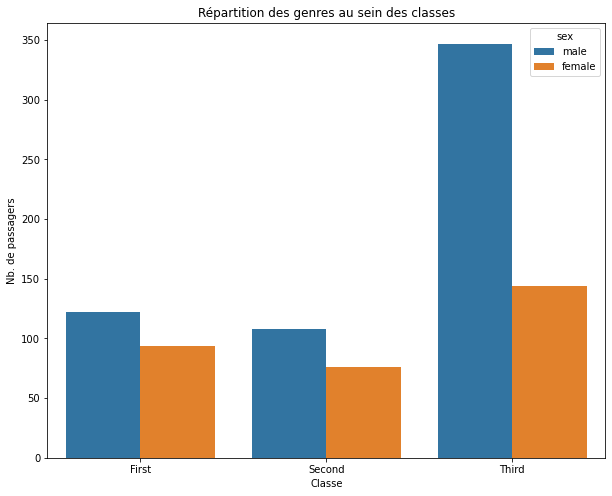

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(data=titanic, x='class', hue='sex')
plt.xlabel('Classe')
plt.ylabel('Nb. de passagers')
plt.title('Répartition des genres au sein des classes')
plt.show()

Après analyse du graphique, une première intuition nous suggère que les hommes ont tendances à plus utiliser la 3ième classe que les femmes.

## 2.2 Test de chi^2

### 2.2.1 Les hypothèses:

* H0(soit l'hypothèse nulle): Il n'y a pas de d'association entre les deux variables qualitatives. 

* H1(soit l'hypothèse alternative): Il existe une association entre les deux variables qualitatives.

### 2.2.2 Les Conditions d'utilisations:

* Les deux variables doivent être qualitatives (catégorielles).
* Les effectifs minimum de chaque classe doit être de 5.

### 2.2.3 L'interprétation:

Si la p-value est inférieur au seuil alpha, alors on rejette H0 et on conclut la présence d'une association entre les deux variables qualitatives.

In [18]:
from scipy.stats import chi2_contingency 

cont_table = pd.crosstab(titanic['sex'], titanic['class'])
cont_table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [23]:
chi, p_value, dof, exp_frep = chi2_contingency(cont_table)

print(str(chi) + ' ' + str(p_value) + ' ' + str(dof) + ' ' + str(exp_frep))

16.971499095517114 0.00020638864348233114 2 [[ 76.12121212  64.84399551 173.03479237]
 [139.87878788 119.15600449 317.96520763]]


Notre p-value est inférieur au seuil 0.005 (0.00020638864348233114), nous rejettons H0, il existe bien une association entre nos deux variables qualitatives.

## 2.3 Coefficient V de Cramer

Ce coefficient permets de mesurer la force de l'association entre deux variables qualitatives. Il varie entre 0 (association nulle) et 1 (association parfaite).

### 2.3.1 Les Conditions d'utilisations:

* Les deux variables doivent être qualitatives (catégorielles).
* Le test de Chi2 à été préalable effectué et mis en évident une association.
* Le nombre de mode de nos deux variables doit être égale

### 2.3.3 L'interprétation:

Plus la valeur V de Cramer est proche de 1 (>0.6), plus l'association entre les deux variables est forte.

In [48]:
n = cont_table.sum().sum()
min_dim = min(cont_table.shape) - 1
cramer_v = np.sqrt(chi / (n * min_dim))
              
print(cramer_v)

0.1380133986221395


Nous concluons que l'association entre nos deux variables qualitatives est faible.

## 2.3 Coefficient T de Tschuprow

Ce coefficient permets de mesurer la force de l'association entre deux variables qualitatives. Il est basé sur le test du chi2 et prend en compte la taille de l'échantillon et le nombre de catégories dans chaque variables.

### 2.3.1 Les Conditions d'utilisations:

* Les deux variables doivent être qualitatives (catégorielles).
* Le test de Chi2 à été préalable effectué et mis en évident une association.
* Le nombre de modes entre les variables qualitative ne doit pas être nécessairement égal.

### 2.3.3 L'interprétation:

Le coefficient T de Tschuprow varie entre 0 et 1. Une valeur proche de 0 indique une faible liaison entre les deux variables, tandis qu'une valeur proche de 1 indique une liaison forte. La force de la liaison dépend du contexte et de la discipline, mais en général, une valeur supérieure à 0,3 est considérée comme une liaison modérée et une valeur supérieure à 0,5 est considérée comme une liaison forte.

In [51]:
# Calculer le coefficient T de Tschuprow
n = titanic.shape[0]
min_dim = min(cont_table.shape) - 1
# Effectuer le test du chi-carré
chi2, p_value, _, _ = st.chi2_contingency(cont_table)
tschuprow_t = np.sqrt(chi2 / (n * min_dim))

print("Coefficient T de Tschuprow :", tschuprow_t)
print("P-valeur :", p_value)

Coefficient T de Tschuprow : 0.1380133986221395
P-valeur : 0.00020638864348233114


Nous concluons que l'association entre nos deux variables qualitatives est faible.

# 3. Analyse des liaisons entre une variable qualitative et une variable quantitative

Dans cette, nous allons explorer différents tests pour étudier la liaison entre une variable qualitative et une variable quantitative. Nous utiliserons les tests de Student (t-test), ANOVA, Mann-Whitney, Kruskal-Walli. Nous utiliserons le jeu de données "Iris" populaire pour démontrer l'application de ces tests en Python.

## 3.1 Analyse graphique

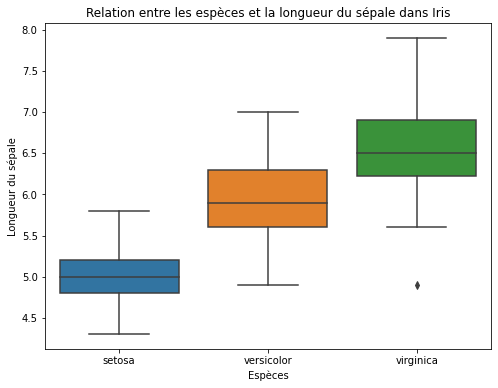

In [54]:
# Créer un boxplot de la relation entre 'species' et 'sepal_length' dans Iris
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris, x='species', y='sepal_length')
plt.xlabel('Espèces')
plt.ylabel('Longueur du sépale')
plt.title('Relation entre les espèces et la longueur du sépale dans Iris')
plt.show()

## 3.2 Test de student

### 3.2.1 Les hypothèses:

* H0 (hypothèse nulle): Les moyennes des deux groupes sont égales. 

* H1 (hypothèse alternative): Les moyennes des deux groupes sont différentes.

### 3.2.2 Les Conditions d'utilisations:

* La variable quantitative est normalement distribuée dans chaque groupe.
* Les variances des deux groupes sont égales.
* Les observations sont indépendantes.

### 3.2.3 L'interprétation:

Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les moyennes des deux groupes sont significativement différentes.

In [55]:
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, wilcoxon

# Charger le jeu de données Iris
iris = sns.load_dataset('iris')

# Séparer les données en deux groupes pour le test de Student et le test de Mann-Whitney
setosa = iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']

P-valeur de la normalité (Shapiro-Wilk) - Setosa: 0.4595281183719635
P-valeur de la normalité (Shapiro-Wilk) - Virginica: 0.25832483172416687
P-valeur de la normalité (Shapiro-Wilk) - Versicolor: 0.46473264694213867


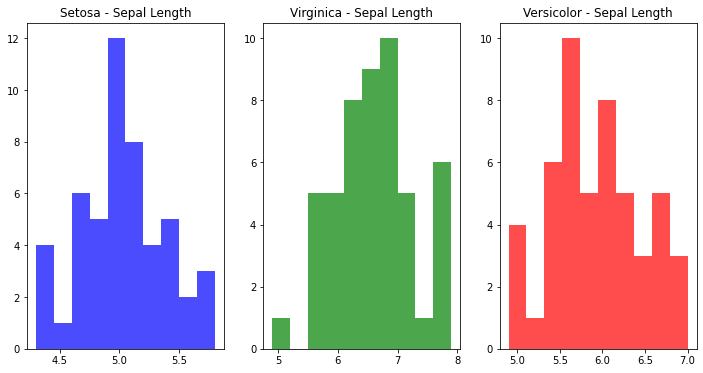

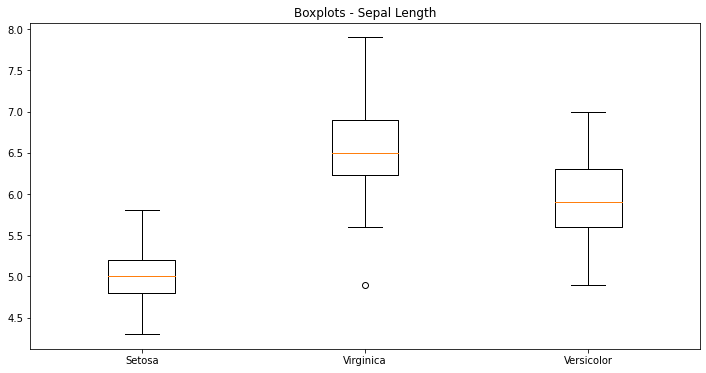

In [56]:
## Vérification de la normalité

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal

# Charger le jeu de données Iris
iris = sns.load_dataset('iris')

# Séparer les données en groupes en fonction de l'espèce
setosa = iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']

# Vérifier la normalité à l'aide du test de Shapiro-Wilk
_, setosa_p_value = shapiro(setosa)
_, virginica_p_value = shapiro(virginica)
_, versicolor_p_value = shapiro(versicolor)

print("P-valeur de la normalité (Shapiro-Wilk) - Setosa:", setosa_p_value)
print("P-valeur de la normalité (Shapiro-Wilk) - Virginica:", virginica_p_value)
print("P-valeur de la normalité (Shapiro-Wilk) - Versicolor:", versicolor_p_value)

# Histogrammes pour vérifier visuellement la normalité
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.hist(setosa, bins=10, color='blue', alpha=0.7)
plt.title("Setosa - Sepal Length")
plt.subplot(132)
plt.hist(virginica, bins=10, color='green', alpha=0.7)
plt.title("Virginica - Sepal Length")
plt.subplot(133)
plt.hist(versicolor, bins=10, color='red', alpha=0.7)
plt.title("Versicolor - Sepal Length")
plt.show()

# Boîtes à moustaches pour vérifier visuellement la normalité
plt.figure(figsize=(12, 6))
plt.boxplot([setosa, virginica, versicolor], labels=['Setosa', 'Virginica', 'Versicolor'])
plt.title("Boxplots - Sepal Length")
plt.show()

In [57]:
# Test de Student (t-test)
t_stat, t_p_value = ttest_ind(setosa, virginica)
print("Statistique t de Student :", t_stat)
print("P-valeur (t-test) :", t_p_value)

Statistique t de Student : -15.386195820079404
P-valeur (t-test) : 6.892546060674059e-28


## 3.3 Test de Mann-Whitney

### 3.3.1 Les hypothèses:

* H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
* H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

### 3.3.2 Les Conditions d'utilisations:

* Les observations sont indépendantes.
* Les données peuvent être ordonnées (au moins ordinale).

### 3.3.3 L'interprétation:

In [62]:
# Test de Mann-Whitney
mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(setosa, virginica)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 38.5
P-valeur (Mann-Whitney) : 6.396699069396538e-17


## 3.4 ANOVA

### 3.4.1 Les hypothèses:

* H0 (hypothèse nulle): Les moyennes de tous les groupes sont égales.
* H1 (hypothèse alternative): Au moins une des moyennes des groupes est différente des autres.

### 3.4.2 Les Conditions d'utilisations:

* La variable quantitative est normalement distribuée dans chaque groupe.
* Les variances des groupes sont égales.
* Les observations sont indépendantes

### 3.4.3 L'interprétation:

Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'au moins une des moyennes des groupes est significativement différente des autres.

In [63]:
# ANOVA
anova_stat, anova_p_value = f_oneway(setosa, virginica, versicolor)
print("Statistique F de l'ANOVA :", anova_stat)
print("P-valeur (ANOVA) :", anova_p_value)

Statistique F de l'ANOVA : 119.26450218450468
P-valeur (ANOVA) : 1.6696691907693826e-31


#### 3.4 BONUS Test de Levene pour l'égalité des variances

Le test de Levene est utilisé pour vérifier l'hypothèse d'égalité des variances entre plusieurs groupes. Il est particulièrement utile après l'ANOVA pour vérifier l'hypothèse d'homoscédasticité.

H0 (hypothèse nulle): Les variances des différents groupes sont égales. 

H1 (hypothèse alternative): Au moins une des variances des différents groupes est différente.

Les échantillons sont indépendants. 

Les observations dans chaque groupe sont indépendantes et identiquement distribuées.

Si la p-valeur est inférieure à un seuil de signification prédéfini (par exemple, 0,05), on rejette l'hypothèse nulle et on conclut que les variances ne sont pas égales entre les groupes.

In [68]:
from scipy.stats import levene

# Test de Levene pour l'égalité des variances
levene_stat, levene_p_value = levene(setosa, virginica, versicolor)
print("Statistique W de Levene :", levene_stat)
print("P-valeur (Levene) :", levene_p_value)

Statistique W de Levene : 6.35272002048269
P-valeur (Levene) : 0.0022585277836218586


## 3.5 Le test de Kruskal-Wallis

C'est un test non paramétrique, utilisable dans le cas où les variances de nos groupes ne sont pas égales (ie: l'ANOVA ne peut être appliquée).

### 3.5.1 Les hypothèses:

* H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
* H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

### 3.5.2 Les Conditions d'utilisations:

* Les observations sont indépendantes.
* Les données peuvent être ordonnées (au moins ordinale).

### 3.3.3 L'interprétation:

In [70]:
# Test de Kruskal-Wallis

kruskal_stat, kruskal_p_value = kruskal(setosa, virginica, versicolor)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 96.93743600064833
P-valeur (Kruskal-Wallis) : 8.91873433246198e-22
